### Introduction
Reliability engineering plays a critical role in ensuring that systems, components, and products meet their expected performance standards over time, under specified conditions. It is foundational in designing systems that are dependable, safe, and effective, minimizing the risk of failure and its associated costs. By building predictive models of reliability, engineers can anticipate potential issues, identify critical components that might fail, and understand the impact of different stressors on the system's longevity. These models enable the proactive management of lifecycle costs and the enhancement of product quality by guiding design improvements and maintenance schedules. Furthermore, designing degradation tests is integral to reliability engineering. These tests simulate the long-term effects of environmental and operational stressors on products in a controlled, accelerated manner. This allows engineers to identify failure modes, validate the reliability predictions, and refine their models. Degradation testing thus provides empirical evidence to support decision-making processes, ensuring that the products will perform reliably in real-world conditions. Through these rigorous practices, reliability engineering ensures that products and systems are trustworthy, durable, and perform as expected, which is crucial for consumer satisfaction, safety, and the sustainable success of businesses.

### Project Objective
The goal of this project is to design an optimal degradation test for determining the sample size, frequency of measurement, and the number of measurements to ensure that precise reliability estimates are obtained. 

In [ ]:
import numpy as np
from itertools import product
#from sklearn.neighbors import KernelDensity
import pandas as pd
#import numpy as np
#import tensorflow as tf
#rom tensorflow.keras import layers, models
from scipy.optimize import minimize
import os
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
os.getcwd()

'C:\\Users\\fa393317\\OneDrive - Ohio University'

In [3]:
# Load the uploaded Excel file
file_path = '\\Users\\fa393317\\OneDrive - Ohio University\\Result_new_new_2.txt'

data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=["n", "m", "f", "Obj"])

data.head()
#len(data)
data.tail()

,n,m,f,Obj
1480,11.0,15.0,5.0,0.773554
1481,12.0,15.0,5.0,0.709091
1482,13.0,15.0,5.0,0.654545
1483,14.0,15.0,5.0,0.607792
1484,15.0,15.0,5.0,0.567273


In [4]:
Cop = 13
Cmea = 2
Cit = 750

data['cost'] = Cop * data['f'] * data['m'] + Cmea * data['n'] * data['m'] + Cit * data['n']
data.head()

,n,m,f,Obj,cost
0,1.0,5.0,1.0,105.198560,825.0
1,2.0,5.0,1.0,52.599280,1585.0
2,3.0,5.0,1.0,35.066187,2345.0
3,4.0,5.0,1.0,26.299640,3105.0
4,5.0,5.0,1.0,21.039712,3865.0


In [9]:
def optimal_solution_dataframe(data, budget):
    """
    This function checks if the cost is less than the budget and returns a DataFrame containing the minimum objective value,
    the decision variables [n, m, f], the cost associated with the optimal objective value, and the specified budget.
    
    Parameters:
    - data: DataFrame containing the cost and objective values along with decision variables.
    - budget: Numeric value representing the budget limit.
    
    Returns:
    - A DataFrame with labels for the optimal solution, if any, within the budget.
    """
    # Filter the DataFrame for rows where the cost is within the budget
    within_budget = data[data['cost'] < budget]
    
    # If there are any rows within the budget, find the row with the minimum objective value
    if not within_budget.empty:
        optimal_row = within_budget.loc[within_budget['Obj'].idxmin()]
        solution = pd.DataFrame({
            'Optimal Obj_Val': [optimal_row['Obj']],
            'n': [optimal_row['n']],
            'm': [optimal_row['m']],
            'f': [optimal_row['f']],
            'Cost': [optimal_row['cost']],
            'Budget': [budget]
        })
        return solution
    else:
        # Return an empty DataFrame with appropriate columns if no costs are within the budget
        return pd.DataFrame(columns=['Optimal Obj_Val', 'n', 'm', 'f', 'Cost', 'Budget'])

# Example usage with a budget of 2000
budget_constraint = 3000
optimal_solution_df = optimal_solution_dataframe(data, budget_constraint)
optimal_solution_df

,Optimal Obj_Val,n,m,f,Cost,Budget
0,2.448492,3.0,12.0,4.0,2946.0,3000


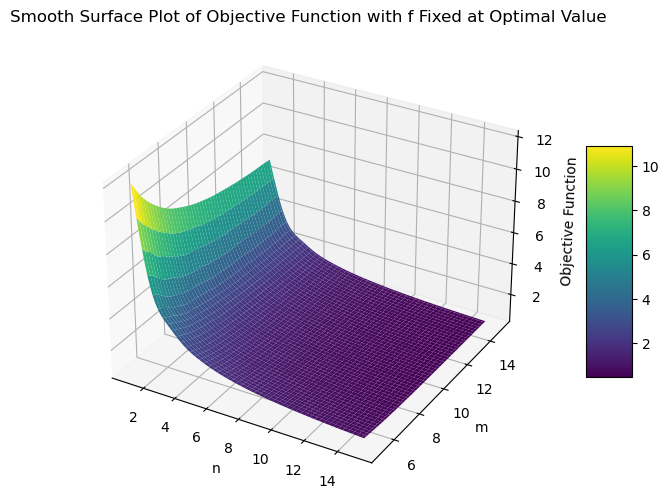

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import griddata

# Load the dataset (assuming it has already been loaded into 'data')
# Extract the optimal values for 'n', 'm', and 'f' from 'optimal_solution_df' or similar
#optimal_n = optimal_solution_df['n'].iloc[0]
#optimal_m = optimal_solution_df['m'].iloc[0]
optimal_f = optimal_solution_df['f'].iloc[0]

# Scenario 1: Holding 'f' fixed, visualize how 'n' and 'm' affect the objective function
# Filter the data for rows where 'f' is close to its optimal value
# This filtering depends on the precision and range of 'f' in your dataset
data_f_fixed = data[data['f'] == optimal_f]

# Create grid coordinates for interpolation
n_range = np.linspace(data_f_fixed['n'].min(), data_f_fixed['n'].max(), 100)
m_range = np.linspace(data_f_fixed['m'].min(), data_f_fixed['m'].max(), 100)
n_grid, m_grid = np.meshgrid(n_range, m_range)

# Interpolate the data to create a smooth surface
obj_values_grid = griddata((data_f_fixed['n'], data_f_fixed['m']), data_f_fixed['Obj'], (n_grid, m_grid), method='cubic')

# Plotting
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Create the surface plot
surf = ax.plot_surface(n_grid, m_grid, obj_values_grid, cmap='viridis', edgecolor='none')

# Add color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

# Labels and title
ax.set_title('Smooth Surface Plot of Objective Function with f Fixed at Optimal Value')
ax.set_xlabel('n')
ax.set_ylabel('m')
ax.set_zlabel('Objective Function')

plt.show()

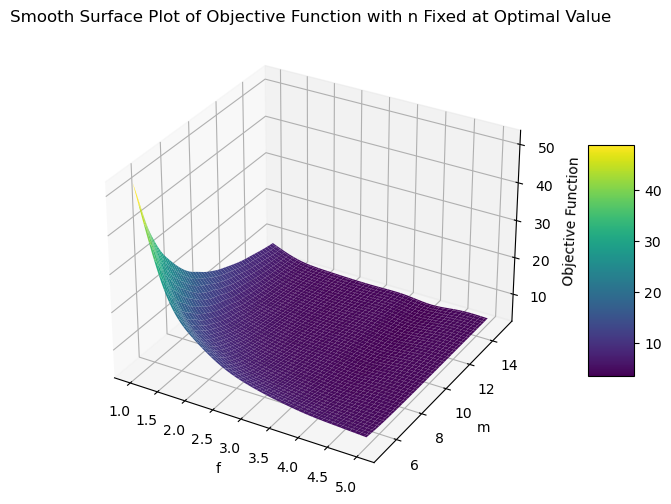

In [7]:
# Load the dataset (assuming it has already been loaded into 'data')
# Extract the optimal values for 'n', 'm', and 'f' from 'optimal_solution_df' or similar
#optimal_n = optimal_solution_df['n'].iloc[0]
#optimal_m = optimal_solution_df['m'].iloc[0]
optimal_n = optimal_solution_df['n'].iloc[0]

# Filter the dataset for the optimal 'n' value
data_n_fixed = data[data['n'] == optimal_n]

# Create grid coordinates for interpolation
f_range = np.linspace(data_n_fixed['f'].min(), data_n_fixed['f'].max(), 100)
m_range = np.linspace(data_n_fixed['m'].min(), data_n_fixed['m'].max(), 100)
f_grid, m_grid = np.meshgrid(f_range, m_range)

# Interpolate the data to create a smooth surface
obj_values_grid = griddata((data_n_fixed['f'], data_n_fixed['m']), data_n_fixed['Obj'], (f_grid, m_grid), method='cubic')

# Plotting
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Create the surface plot
surf = ax.plot_surface(f_grid, m_grid, obj_values_grid, cmap='viridis', edgecolor='none')

# Add color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

# Labels and title
ax.set_title('Smooth Surface Plot of Objective Function with n Fixed at Optimal Value')
ax.set_xlabel('f')
ax.set_ylabel('m')
ax.set_zlabel('Objective Function')

plt.show()

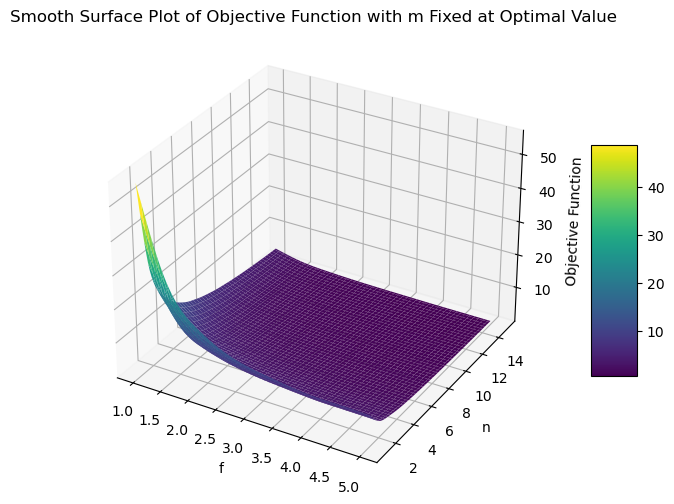

In [8]:
# Extract the optimal 'm' from the results
optimal_m = optimal_solution_df['m'].iloc[0]

# Filter the dataset for the optimal 'm' value
data_m_fixed = data[data['m'] == optimal_m]

# Create grid coordinates for interpolation
f_range = np.linspace(data_m_fixed['f'].min(), data_m_fixed['f'].max(), 100)
n_range = np.linspace(data_m_fixed['n'].min(), data_m_fixed['n'].max(), 100)
f_grid, n_grid = np.meshgrid(f_range, n_range)

# Interpolate the data to create a smooth surface
obj_values_grid = griddata((data_m_fixed['f'], data_m_fixed['n']), data_m_fixed['Obj'], (f_grid, n_grid), method='cubic')

# Plotting
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Create the surface plot
surf = ax.plot_surface(f_grid, n_grid, obj_values_grid, cmap='viridis', edgecolor='none')

# Add color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

# Labels and title
ax.set_title('Smooth Surface Plot of Objective Function with m Fixed at Optimal Value')
ax.set_xlabel('f')
ax.set_ylabel('n')
ax.set_zlabel('Objective Function')

plt.show()

In [9]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d, UnivariateSpline
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Load your dataset
# Ensure to adjust the path to where your actual data is located
#data = pd.read_excel('/path/to/your/Result_new.xlsx')

# Function to filter the data based on fixed values of n and m
def filter_by_n_m_with_fixed_values(data, n_value, m_value):
    filtered_data = data[(data['n'] == n_value) & (data['m'] == m_value)]
    return filtered_data[['n', 'm', 'f', 'Obj', 'cost']].reset_index(drop=True)

# Function to perform cross-validation for spline degree selection
def cross_validate_spline_degree(X, y):
    
    if len(X) < 5:  # Ensuring a minimum for cubic spline fitting
        return None  # Or consider returning 1 for a linear fit as a fallback
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Adjust as necessary
    best_k = None
    lowest_error = np.inf
    
    for k in range(1, 4):  # Testing spline degrees from linear (1) to cubic (3) or quartic (4)
        errors = []
        
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            # Fit a UnivariateSpline to the training data
            spline = UnivariateSpline(X_train, y_train, k=k, s=len(X_train))
            
            # Predict on the test data and calculate error
            error = mean_squared_error(y_test, spline(X_test))
            errors.append(error)
        
        avg_error = np.mean(errors)
        if avg_error < lowest_error:
            best_k = k
            lowest_error = avg_error
            
    return best_k

# Adjusted function that focuses on the essential outputs
def find_global_optimum(data, budget_constraint):
    global_optimum = {'Objective': np.inf}  # Start with an infinitely high objective

    for (n_value, m_value) in data[['n', 'm']].drop_duplicates().itertuples(index=False):
        filtered_df = filter_by_n_m_with_fixed_values(data, n_value, m_value)
        within_budget = filtered_df[filtered_df['cost'] <= budget_constraint]

        if within_budget.empty or len(within_budget) < 5:
            continue  # Skip if insufficient data

        X = within_budget['f'].values
        y = within_budget['Obj'].values

        best_k = cross_validate_spline_degree(X, y)

        # Fit the best spline
        spline = UnivariateSpline(X, y, k=best_k, s=len(X))

        # Determine the f value with the minimum objective on the spline
        f_values_dense = np.linspace(X.min(), X.max(), 300)
        y_dense = spline(f_values_dense)
        min_idx = np.argmin(y_dense)
        smoothed_f = f_values_dense[min_idx]
        smoothed_obj = y_dense[min_idx]

        if smoothed_obj < global_optimum['Objective']:
            global_optimum = {
                'n': n_value, 'm': m_value, 'f': smoothed_f, 'Objective': smoothed_obj, 'k': best_k
            }

    return global_optimum

# Example: Define your budget constraint
#budget_constraint = 3000

# Run the optimization and print the global optimum
optimal_solution = find_global_optimum(data, budget_constraint)
if optimal_solution['Objective'] != np.inf:
    print(f"Global Optimum: n={optimal_solution['n']}, m={optimal_solution['m']}, "
          f"f={optimal_solution['f']:.2f}, Objective={optimal_solution['Objective']:.2f}, "
          f"Best k={optimal_solution['k']}")
else:
    print("No optimal solution found within the budget constraint.")
    

Global Optimum: n=2.0, m=6.0, f=4.50, Objective=4.28, Best k=3


In [10]:
# Function to filter the data based on fixed values of n and m
def filter_by_n_m_with_fixed_values(data, n_value, m_value):
    filtered_data = data[(data['n'] == n_value) & (data['m'] == m_value)]
    result = filtered_data[['n', 'm', 'f', 'Obj', 'cost']].reset_index(drop=True)
    return result

# Function to adjust spline smoothing considering the cost and estimate cost after smoothing
def adjust_spline_with_cost_and_estimate_cost_1(filtered_df, budget_constraint):
    within_budget = filtered_df[filtered_df['cost'] <= budget_constraint]
    if within_budget.empty or len(within_budget) < 4:  # Need at least two points to interpolate
        return None, None, None, None, None, None

    x_within_budget = within_budget['f']
    y_within_budget = within_budget['Obj']
    costs_within_budget = within_budget['cost']

    # Linear interpolation for costs
    cost_interp = interp1d(x_within_budget, costs_within_budget, fill_value="extrapolate")

    spline = make_interp_spline(x_within_budget, y_within_budget, k=1)
    x_smooth = np.linspace(x_within_budget.min(), x_within_budget.max(), 300)
    y_smooth = spline(x_smooth)
    min_idx = np.argmin(y_smooth)
    smoothed_f = x_smooth[min_idx]
    smoothed_obj = y_smooth[min_idx]

    # Estimate cost for the smoothed f
    estimated_cost_after_smoothing = cost_interp(smoothed_f)

    closest_original_idx = (x_within_budget - smoothed_f).abs().idxmin()
    closest_original_row = within_budget.loc[closest_original_idx]

    return smoothed_f, smoothed_obj, estimated_cost_after_smoothing, closest_original_row['f'], closest_original_row['cost'], closest_original_row['Obj']

# Iterate over unique n, m combinations and apply the adjusted approach
n_m_combinations = data[['n', 'm']].drop_duplicates()
adjusted_results = []
#budget_constraint = 3000  # Define your budget constraint here

for index, row in n_m_combinations.iterrows():
    n_value, m_value = row['n'], row['m']
    filtered_df = filter_by_n_m_with_fixed_values(data, n_value, m_value)
    smoothed_f, smoothed_obj, est_cost_after_smoothing, original_f, cost_before_smoothing, obj_before_smoothing = adjust_spline_with_cost_and_estimate_cost_1(filtered_df, budget_constraint)
    
    if smoothed_f is not None:
        adjusted_results.append({
            'n': n_value,
            'm': m_value,
            'Original f': original_f,
            'Smoothed f': smoothed_f,
            'Cost Before Smoothing': cost_before_smoothing,
            'Estimated Cost After Smoothing': est_cost_after_smoothing,
            'Objective Before Smoothing': obj_before_smoothing,
            'Objective After Smoothing': smoothed_obj,
            'Budget': budget_constraint
        })

adjusted_results_df_1 = pd.DataFrame(adjusted_results)

# Display the results
#adjusted_results_df

In [11]:
from scipy.interpolate import make_interp_spline, interp1d
import numpy as np

# Function to filter the data based on fixed values of n and m
def filter_by_n_m_with_fixed_values(data, n_value, m_value):
    filtered_data = data[(data['n'] == n_value) & (data['m'] == m_value)]
    result = filtered_data[['n', 'm', 'f', 'Obj', 'cost']].reset_index(drop=True)
    return result

# Function to perform cross-validation-like approach for selecting the best k
def adjust_spline_with_cost_and_estimate_cost_1(filtered_df, budget_constraint):
    within_budget = filtered_df[filtered_df['cost'] <= budget_constraint]
    if within_budget.empty or len(within_budget) < 4:  # Ensure there are enough points
        return None

    x_within_budget = within_budget['f'].values
    y_within_budget = within_budget['Obj'].values
    costs_within_budget = within_budget['cost'].values

    best_k = None
    best_smoothed_obj = np.inf
    best_smoothed_f = None
    best_estimated_cost = None
    best_original_f = None
    best_cost_before_smoothing = None
    best_obj_before_smoothing = None
    
    for k in [1, 2, 3]:  # Evaluate linear, quadratic, and cubic splines
        try:
            spline = make_interp_spline(x_within_budget, y_within_budget, k=k)
            x_smooth = np.linspace(x_within_budget.min(), x_within_budget.max(), 300)
            y_smooth = spline(x_smooth)
            min_idx = np.argmin(y_smooth)
            smoothed_f = x_smooth[min_idx]
            smoothed_obj = y_smooth[min_idx]
            cost_interp = interp1d(x_within_budget, costs_within_budget, fill_value="extrapolate")
            estimated_cost_after_smoothing = cost_interp(smoothed_f)
            
            if smoothed_obj < best_smoothed_obj:
                best_k = k
                best_smoothed_obj = smoothed_obj
                best_smoothed_f = smoothed_f
                best_estimated_cost = estimated_cost_after_smoothing
                closest_idx = np.abs(x_within_budget - smoothed_f).argmin()
                best_original_f = x_within_budget[closest_idx]
                best_cost_before_smoothing = costs_within_budget[closest_idx]
                best_obj_before_smoothing = y_within_budget[closest_idx]
        except Exception as e:
            print(f"Error with k={k}: {e}")

    if best_k is not None:
        return (best_smoothed_f, best_smoothed_obj, best_estimated_cost, best_original_f, 
                best_cost_before_smoothing, best_obj_before_smoothing, best_k)
    else:
        return None

# Example usage of the adjusted function
#budget_constraint = 5000  # Define your budget constraint here
results = []
for index, row in n_m_combinations.iterrows():
    n_value, m_value = row['n'], row['m']
    filtered_df = filter_by_n_m_with_fixed_values(data, n_value, m_value)
    result = adjust_spline_with_cost_and_estimate_cost_1(filtered_df, budget_constraint)
    
    if result:
        smoothed_f, smoothed_obj, estimated_cost, original_f, cost_before_smoothing, obj_before_smoothing, best_k = result
        results.append({
            'n': n_value, 'm': m_value, 'Best k': best_k,
            'Smoothed f': smoothed_f, 'Smoothed Obj': smoothed_obj, 'Estimated Cost': estimated_cost,
            'Original f': original_f, 'Cost Before Smoothing': cost_before_smoothing, 
            'Objective Before Smoothing': obj_before_smoothing
        })

adjusted_results_df = pd.DataFrame(results)
#adjusted_results_df


In [12]:
# Ensure the data, n_m_combinations, and budget_constraint are defined as before

optimal_results = []
min_obj_before_smoothing = float('inf')
min_obj_after_smoothing = float('inf')
optimal_before_smoothing = None
optimal_after_smoothing = None

for index, row in n_m_combinations.iterrows():
    n_value, m_value = row['n'], row['m']
    filtered_df = filter_by_n_m_with_fixed_values(data, n_value, m_value)
    result = adjust_spline_with_cost_and_estimate_cost_1(filtered_df, budget_constraint)
    
    if result:
        smoothed_f, smoothed_obj, est_cost_after_smoothing, original_f, cost_before_smoothing, obj_before_smoothing, best_k = result
        
        if obj_before_smoothing < min_obj_before_smoothing:
            min_obj_before_smoothing = obj_before_smoothing
            optimal_before_smoothing = {
                'n': n_value, 'm': m_value, 'Original f': original_f, 'Cost Before Smoothing': cost_before_smoothing, 
                'Objective Before Smoothing': obj_before_smoothing, 'Budget': budget_constraint, 'Best k Before Smoothing': best_k
            }
        
        if smoothed_obj < min_obj_after_smoothing:
            min_obj_after_smoothing = smoothed_obj
            optimal_after_smoothing = {
                'n': n_value, 'm': m_value, 'Smoothed f': smoothed_f, 'Estimated Cost After Smoothing': est_cost_after_smoothing, 
                'Objective After Smoothing': smoothed_obj, 'Budget': budget_constraint, 'Best k After Smoothing': best_k
            }

# To display the results, ensuring at least one optimal result exists
if optimal_before_smoothing or optimal_after_smoothing:
    optimal_results_df = pd.DataFrame([optimal_before_smoothing, optimal_after_smoothing])
    #print(optimal_results_df)
#else:
#    print("No optimal solution found within the budget constraint.")
optimal_results_df

,n,m,Original f,Cost Before Smoothing,Objective Before Smoothing,Budget,Best k Before Smoothing,Smoothed f,Estimated Cost After Smoothing,Objective After Smoothing,Best k After Smoothing
0,2.0,7.0,4.0,1990.0,4.660267,2000,1.0,NaN,NaN,NaN,NaN
1,2.0,7.0,NaN,NaN,NaN,2000,NaN,4.0,1990.0,4.660267,1.0


In [13]:
'''
# Iterating over n, m combinations and applying the analysis
optimal_results = []
min_obj_before_smoothing = float('inf')
min_obj_after_smoothing = float('inf')
optimal_before_smoothing = None
optimal_after_smoothing = None

for index, row in n_m_combinations.iterrows():
    n_value, m_value = row['n'], row['m']
    filtered_df = filter_by_n_m_with_fixed_values(data, n_value, m_value)
    smoothed_f, smoothed_obj, est_cost_after_smoothing, original_f, cost_before_smoothing, obj_before_smoothing = adjust_spline_with_cost_and_estimate_cost_1(filtered_df, budget_constraint)
    
    if obj_before_smoothing is not None and obj_before_smoothing < min_obj_before_smoothing:
        min_obj_before_smoothing = obj_before_smoothing
        optimal_before_smoothing = {
            'n': n_value, 'm': m_value, 'Original f': original_f, 'cost': cost_before_smoothing, 'Objective': obj_before_smoothing, 'Budget': budget_constraint
        }
    
    if smoothed_obj is not None and smoothed_obj < min_obj_after_smoothing:
        min_obj_after_smoothing = smoothed_obj
        optimal_after_smoothing = {
            'n': n_value, 'm': m_value, 'Smoothed f': smoothed_f, 'Estimated Cost After Smoothing': est_cost_after_smoothing, 'Objective After Smoothing': smoothed_obj, 'Budget': budget_constraint
        }

# Compile the optimal results into a DataFrame for easy viewing
optimal_results_df = pd.DataFrame([optimal_before_smoothing, optimal_after_smoothing])

#optimal_results_df
'''

"\n# Iterating over n, m combinations and applying the analysis\noptimal_results = []\nmin_obj_before_smoothing = float('inf')\nmin_obj_after_smoothing = float('inf')\noptimal_before_smoothing = None\noptimal_after_smoothing = None\n\nfor index, row in n_m_combinations.iterrows():\n    n_value, m_value = row['n'], row['m']\n    filtered_df = filter_by_n_m_with_fixed_values(data, n_value, m_value)\n    smoothed_f, smoothed_obj, est_cost_after_smoothing, original_f, cost_before_smoothing, obj_before_smoothing = adjust_spline_with_cost_and_estimate_cost_1(filtered_df, budget_constraint)\n    \n    if obj_before_smoothing is not None and obj_before_smoothing < min_obj_before_smoothing:\n        min_obj_before_smoothing = obj_before_smoothing\n        optimal_before_smoothing = {\n            'n': n_value, 'm': m_value, 'Original f': original_f, 'cost': cost_before_smoothing, 'Objective': obj_before_smoothing, 'Budget': budget_constraint\n        }\n    \n    if smoothed_obj is not None and

In [14]:
#optimal_results_df['n'][0]

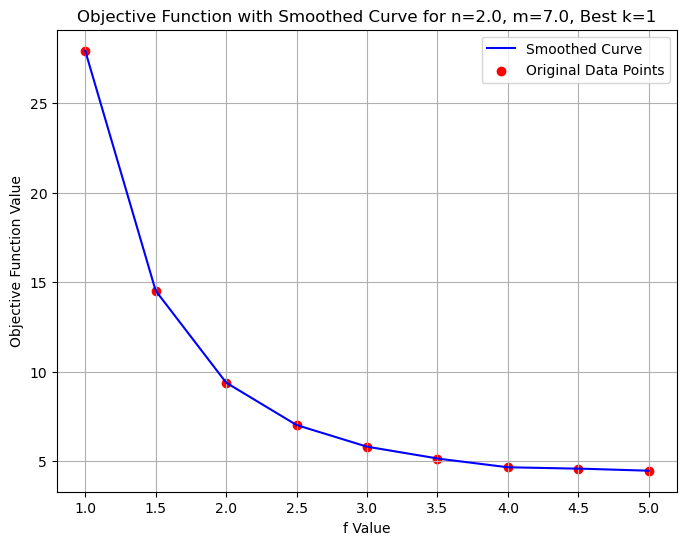

In [15]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np

# Assuming optimal_n, optimal_m, and data are defined as before

# Retrieve the 'Best k After Smoothing' for the optimal n, m combination
# Make sure 'Best k After Smoothing' is correctly named and stored in your results
#best_k_after_smoothing = int(optimal_results_df.loc[(optimal_results_df['n'] == optimal_n) & (optimal_results_df['m'] == optimal_m), 'Best k After Smoothing'].values[0])
best_k_after_smoothing = int(optimal_results_df['Best k After Smoothing'][1])

# Filter the dataset for the given n and m
filtered_data = data[(data['n'] == optimal_n) & (data['m'] == optimal_m)]

# Assuming the 'f' values and corresponding 'Obj' values are directly related
f_values = filtered_data['f'].values
obj_values = filtered_data['Obj'].values

# Generate more f values for smoothing the curve using the best k
f_values_smooth = np.linspace(f_values.min(), f_values.max(), 300)
spl = make_interp_spline(f_values, obj_values, k=best_k_after_smoothing)  # Use the best k for smoothing
obj_values_smooth = spl(f_values_smooth)

# Plotting the smoothed curve and original data points
plt.figure(figsize=(8, 6))
plt.plot(f_values_smooth, obj_values_smooth, label='Smoothed Curve', color='blue')
plt.scatter(f_values, obj_values, color='red', label='Original Data Points')

# Include any additional plotting for optimal points if needed
# plt.scatter([...], [...], label='Optimal Point', color='green', s=100, zorder=5)

plt.title(f'Objective Function with Smoothed Curve for n={optimal_n}, m={optimal_m}, Best k={best_k_after_smoothing}')
plt.xlabel('f Value')
plt.ylabel('Objective Function Value')
plt.legend()
plt.grid(True)
plt.show()


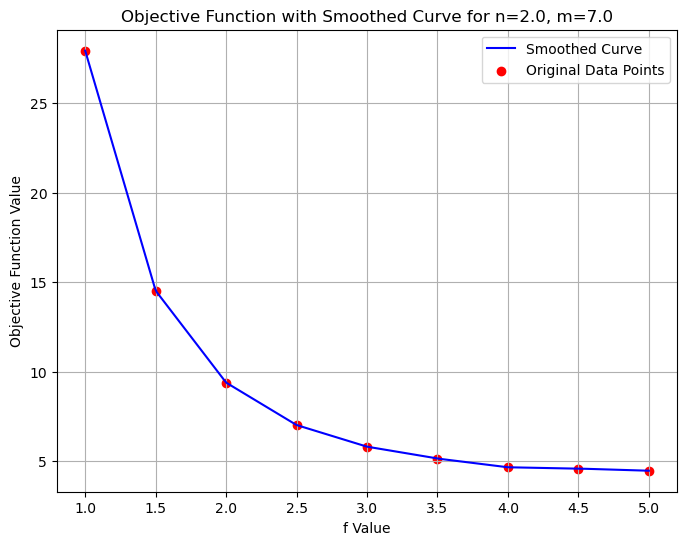

In [16]:


# Assuming optimal n, m have been identified. Replace these with actual optimal values from your analysis.
optimal_n = optimal_results_df['n'][0]  # Example value
optimal_m = optimal_results_df['m'][0]  # Example value

budget = budget_constraint  # Assuming a budget constraint

# Filter the dataset for the given n and m
filtered_data = data[(data['n'] == optimal_n) & (data['m'] == optimal_m)]

# Assuming the 'f' values and corresponding 'Obj' values are directly related
f_values = filtered_data['f'].values
obj_values = filtered_data['Obj'].values

# Generate more f values for smoothing the curve
f_values_smooth = np.linspace(f_values.min(), f_values.max(), 300)
spl = make_interp_spline(f_values, obj_values, k=1)  # Cubic spline for smoothing
obj_values_smooth = spl(f_values_smooth)

# Plotting the smoothed curve and original data points
plt.figure(figsize=(8, 6))
plt.plot(f_values_smooth, obj_values_smooth, label='Smoothed Curve', color='blue')
plt.scatter(f_values, obj_values, color='red', label='Original Data Points')

# Highlighting the optimal f value before smoothing (use actual value from analysis)
# plt.scatter([optimal_f_before], [optimal_obj_before], color='green', s=100, label='Optimal Original f', zorder=5)

# Highlighting the optimal f value after smoothing (use actual value from analysis)
# plt.scatter([optimal_f_after], [optimal_obj_after], color='gold', s=100, label='Optimal Smoothed f', zorder=5)

plt.title(f'Objective Function with Smoothed Curve for n={optimal_n}, m={optimal_m}')
plt.xlabel('f Value')
plt.ylabel('Objective Function Value')
plt.legend()
plt.grid(True)
plt.show()


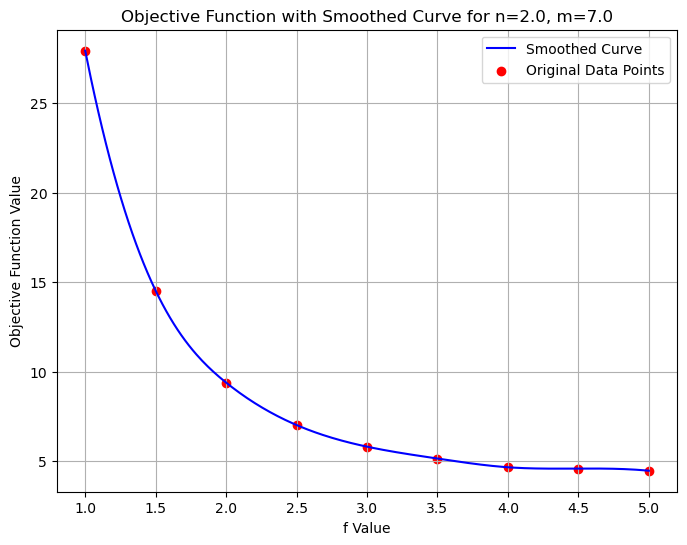

In [17]:
from scipy.interpolate import UnivariateSpline
# Assuming optimal n, m have been identified. Replace these with actual optimal values from your analysis.
optimal_n = optimal_results_df['n'][0]  # Example value
optimal_m = optimal_results_df['m'][0]  # Example value

budget = budget_constraint  # Assuming a budget constraint

# Filter the dataset for the given n and m
filtered_data = data[(data['n'] == optimal_n) & (data['m'] == optimal_m)]

# Assuming the 'f' values and corresponding 'Obj' values are directly related
f_values = filtered_data['f'].values
obj_values = filtered_data['Obj'].values

spline = UnivariateSpline(f_values, obj_values, s=0)  # Adjust 's' as needed for your data


# Generate more f values for smoothing the curve
f_values_smooth = np.linspace(f_values.min(), f_values.max(), 300)
#spl = make_interp_spline(f_values, obj_values, k=3)  # Cubic spline for smoothing
obj_values_smooth = spline(f_values_smooth)

# Plotting the smoothed curve and original data points
plt.figure(figsize=(8, 6))
plt.plot(f_values_smooth, obj_values_smooth, label='Smoothed Curve', color='blue')
plt.scatter(f_values, obj_values, color='red', label='Original Data Points')

# Highlighting the optimal f value before smoothing (use actual value from analysis)
# plt.scatter([optimal_f_before], [optimal_obj_before], color='green', s=100, label='Optimal Original f', zorder=5)

# Highlighting the optimal f value after smoothing (use actual value from analysis)
# plt.scatter([optimal_f_after], [optimal_obj_after], color='gold', s=100, label='Optimal Smoothed f', zorder=5)

plt.title(f'Objective Function with Smoothed Curve for n={optimal_n}, m={optimal_m}')
plt.xlabel('f Value')
plt.ylabel('Objective Function Value')
plt.legend()
plt.grid(True)
plt.show()
